[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Today's Date: 2025-04-12
Please write your diary entry for today (press Enter when done):
it wasnt as good as a iexpected it to be..could have been better..not in a good mood and by back aches
Sentiment Score for today: -0.7015


<ipython-input-1-25842fab8c51>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


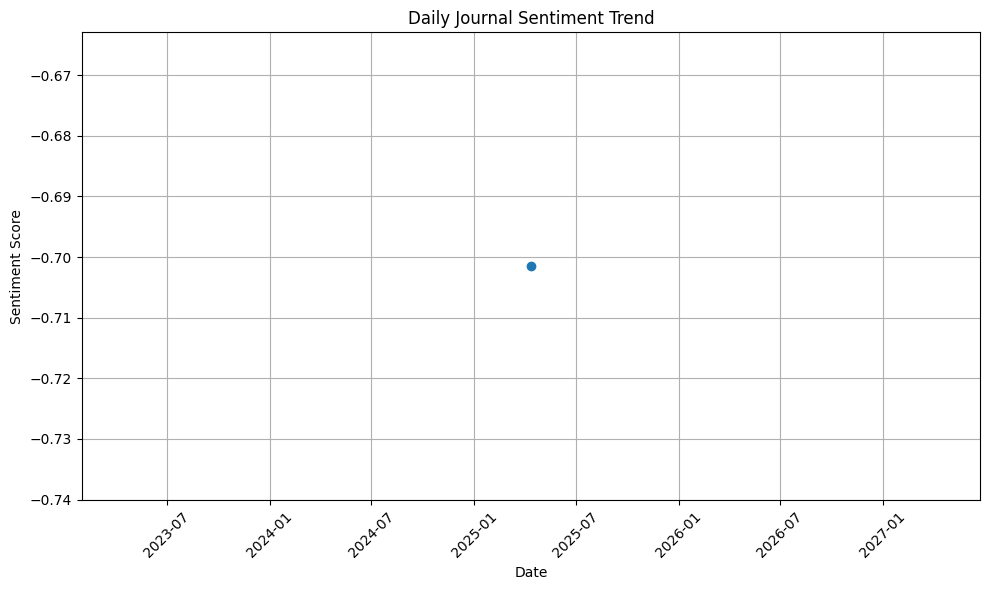

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

def get_daily_journal():
    """Prompt the user for a diary entry."""
    print("Please write your diary entry for today (press Enter when done):")
    entry = input()
    return entry

def analyze_sentiment(entry):
    """Analyze the sentiment of the diary entry using VADER."""
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(entry)
    return sentiment['compound']

def update_journal_csv(date_str, sentiment_score, filename="journal_sentiment.csv"):
    """Update or create a CSV file that logs the daily sentiment scores."""
    if os.path.exists(filename):
        df = pd.read_csv(filename)
    else:
        df = pd.DataFrame(columns=["Date", "Sentiment"])

    # If today's entry exists, update it; otherwise, append a new row.
    if date_str in df['Date'].values:
        print("Updating today's entry.")
        df.loc[df["Date"] == date_str, "Sentiment"] = sentiment_score
    else:
        new_row = pd.DataFrame({"Date": [date_str], "Sentiment": [sentiment_score]})
        df = pd.concat([df, new_row], ignore_index=True)

    df.to_csv(filename, index=False)
    return df

def plot_sentiment_trend(df):
    """Visualize the sentiment trend over time."""
    df["Date"] = pd.to_datetime(df["Date"])
    df.sort_values("Date", inplace=True)

    plt.figure(figsize=(10, 6))
    plt.plot(df["Date"], df["Sentiment"], marker='o', linestyle='-')
    plt.title("Daily Journal Sentiment Trend")
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    today_str = datetime.today().strftime("%Y-%m-%d")
    print(f"Today's Date: {today_str}")

    # Get today's journal entry from the user.
    journal_entry = get_daily_journal()

    # Analyze sentiment of the entry.
    sentiment_score = analyze_sentiment(journal_entry)
    print(f"Sentiment Score for today: {sentiment_score}")

    # Log the sentiment score and update the CSV.
    df = update_journal_csv(today_str, sentiment_score)

    # Plot the historical sentiment trend.
    plot_sentiment_trend(df)

if __name__ == "__main__":
    main()
